# 결론
## 고객의 결제여부에 영향을 미치는 요인은 무엇일까?
> * 고객의 결제여부: has_paid
> * 몇가지 종류의 소득데이터를 보유하고 있는지가 고객의 결제여부에 영향을 미친다
    * 소득 데이터가 전부 있으면 결제를 했을 가능성이, 소득데이터가 전부 없으면 결제를 안했을 가능성이 높다
> * <span style="color:red"> 소득 데이터가 한개,두개일 경우 결제여부를 유의미하게 분류할 수 있는 방법을 찾고싶음</span>
## 고객의 수수료 결제금액 합을 높히기 위해서는 어떻게 해야할까?
> * 수수료 결제금액의 합: has_paid가 True인 데이터의 fee값
> * 수수료 1만원 이상인 고객이 수수료 1만원 미만 고객보다 결제금액의 합이 약 1.7배 더 높다
    * 수수료 결제금액이 10000원 미만인 고객과의 거래를 줄이고 10000원 이상인 고객을 중점적으로 관리하자
> * <span style="color:red">  수수료 결제금액을 누적시킨 데이터를 통해 어느구간이 가장 중요한지를 파악해보고 싶음 </span>


## 테이블의 내용은 아래의 내용을 담고 있습니다.
1. 고객이 각 귀속년도별
1. 근로 / 사업 / 기타 소득에 대한 예상환급액과 수수료를 조회한 뒤
1. 결제를 하거나 하지 않은 여부를 저장

## 컬럼 정보는 다음과 같습니다.
- age: 고객의 만 나이입니다. 
- gender: 고객의 성별입니다.
- year: 소득이 발생한 연도(귀속년도)입니다.
- refund: 예상환급액입니다.
- fee: 수수료입니다.
- has_paid: 수수료를 결제했는지의 여부
- income_근로: 고객의 근로소득(월급/일용직급여)
- income_사업: 고객의 사업소득(프리랜서 소득)
- income_기타: 고객의 기타소득(그외 기타 소득)

## 아래의 질문에 나름의 방식으로 답을 찾아주세요.
(정답은 없습니다. 문제를 정의하고, 해답에 이르게 된 과정과 그 해석을 잘 설득/설명해 주시는 것이 중요합니다.)

- 고객의 결제여부에 영향을 미치는 요인들은 무엇인가요? 
- 고객의 수수료 결제금액의 합을 높히기 위해서는 어떻게 해야 할까요?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정
plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

In [3]:
df = pd.read_csv('Jobis_3o3.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        100000 non-null  float64
 1   gender     100000 non-null  object 
 2   year       100000 non-null  int64  
 3   refund     100000 non-null  float64
 4   fee        100000 non-null  float64
 5   has_paid   100000 non-null  bool   
 6   income_근로  40791 non-null   float64
 7   income_사업  78227 non-null   float64
 8   income_기타  25260 non-null   float64
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 6.2+ MB


In [5]:
df.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN


In [6]:
df.corr()

,age,year,refund,fee,has_paid,income_근로,income_사업,income_기타
age,1.000000,-0.113500,0.078485,0.072135,-0.022918,0.341343,0.097144,0.105064
year,-0.113500,1.000000,0.140977,0.169537,-0.136060,0.075071,0.149177,0.035263
refund,0.078485,0.140977,1.000000,0.969427,-0.094061,-0.110196,0.785344,0.737711
fee,0.072135,0.169537,0.969427,1.000000,-0.117695,-0.112256,0.777466,0.742307
has_paid,-0.022918,-0.136060,-0.094061,-0.117695,1.000000,-0.014584,-0.103945,-0.108696
income_근로,0.341343,0.075071,-0.110196,-0.112256,-0.014584,1.000000,-0.091732,0.044542
income_사업,0.097144,0.149177,0.785344,0.777466,-0.103945,-0.091732,1.000000,0.067535
income_기타,0.105064,0.035263,0.737711,0.742307,-0.108696,0.044542,0.067535,1.000000


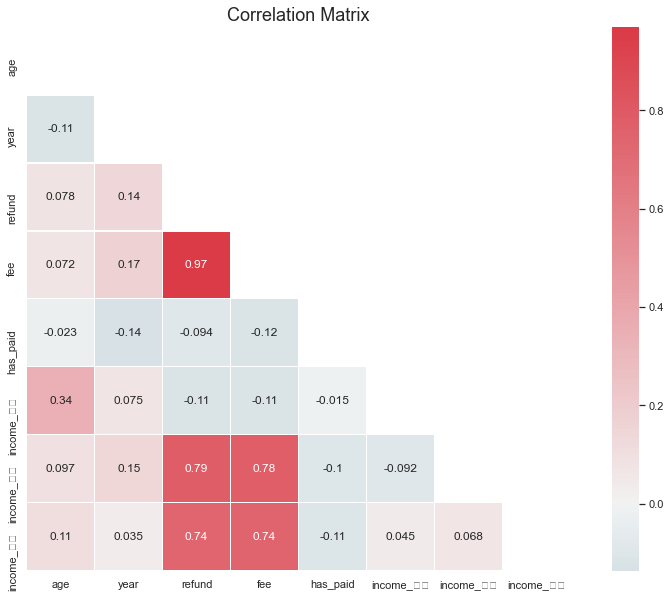

In [31]:
sns.set(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap,  center=0,
            square=True, linewidths=.5, annot=True)
plt.show()

* fee와 refund는 매우높은 상관관계가 있다
* 유독 근로소득과 refund의 상관관계가 낮은 이유는 뭘까?

## 결제여부를 기준으로 고객을 나눠본다

In [37]:
paid_group = df[df['has_paid'] == True] #결제그룹
not_paid_group= df[df['has_paid'] == False] #미결제 그룹

#### 결제비율

In [170]:
print(len(not_paid_group)) #결제안한사람
print(len(paid_group)) #결제한사람
print('%.2f'%(len(paid_group)/len(df)*100)+'%') #결제한사람의 비율

35357
64643
64.64%


#### 범주형 데이터 살펴보기

In [206]:
print(set(df['gender']))
print(set(df['has_paid']))
print(set(df['year']))

{'M', '-', 'F'}
{False, True}
{2016, 2017, 2018, 2019, 2020, 2015}


## 성별이 -인 값은 유의미한 의미가 있을까
* 예를들어 법인이나 단체를 의미한다?
* 법인이나 단체라면 일반고객에 비해 fee와 refund가 높게 나오는가?

In [151]:
non_gender = df[df['gender']=='-']
non_gender

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
2613,27.0,-,2016,559000.0,12800.0,False,NaN,NaN,NaN
4101,27.0,-,2017,209000.0,4300.0,False,NaN,NaN,NaN
9574,42.0,-,2015,175000.0,4300.0,False,NaN,NaN,NaN
20536,26.0,-,2017,845000.0,25100.0,False,NaN,NaN,NaN
28211,26.0,-,2016,650000.0,12800.0,False,NaN,NaN,NaN
36217,27.0,-,2018,124000.0,3400.0,False,NaN,NaN,NaN
37674,27.0,-,2015,252000.0,8500.0,False,NaN,NaN,NaN
38223,53.0,-,2015,6000.0,400.0,False,NaN,NaN,NaN
38441,23.0,-,2018,110000.0,3000.0,False,NaN,NaN,NaN
41454,41.0,-,2015,122000.0,4300.0,True,NaN,NaN,NaN


#### non_gender그룹과 df그룹의 refund,fee 평균값 비교

In [187]:
print('non_gender그룹의 refund평균값은: '+'%.2f'%((np.mean(non_gender['refund']))))
print('df그룹의 refund평균값은: '+'%.2f'%((np.mean(df['refund']))))
print()
print('non_gender그룹의 fee평균값은: '+'%.2f'%((np.mean(non_gender['fee']))))
print('df그룹의 fee평균값은: '+'%.2f'%((np.mean(df['fee']))))

non_gender그룹의 refund평균값은: 243818.18
df그룹의 refund평균값은: 208142.24

non_gender그룹의 fee평균값은: 7431.82
df그룹의 fee평균값은: 7247.64


* 유의미한 차이가 없다
* (오히려 income_사업 데이터가 있는 row가 법인이나 단체일 가능성이 더 크다는 생각이 들었음)

#### non_gender그룹은 has_paid가 False인 값이 많아보인다

In [172]:
#non_gender그룹의 결제비율
print('%.2f'%(len(non_gender[non_gender['has_paid']== True])/len(non_gender)*100)+'%')

18.18%


#### non_gender그룹: 근로소득,사업소득,기타소득이 전부 없다
#### 전체 데이터에서 결제비율은 약 64% / non_gender그룹에서 결제비율은 약 18%
* non_gender그룹의 특징인 '3소득이 모두 없다'는 것이 결제비율과 연관이 있을까?

In [191]:
three_non = df[np.isnan(df['income_근로']) & np.isnan(df['income_사업']) & np.isnan(df['income_기타'])] #근로,사업,기타소득 전부 없는그룹

#### three_non그룹과 df그룹의 refund,fee 평균값 비교

In [192]:
print('three_non그룹의 refund평균값은: '+'%.2f'%((np.mean(three_non['refund']))))
print('df그룹의 refund평균값은: '+'%.2f'%((np.mean(df['refund']))))
print()
print('three_non그룹의 fee평균값은: '+'%.2f'%((np.mean(three_non['fee']))))
print('df그룹의 fee평균값은: '+'%.2f'%((np.mean(df['fee']))))

three_non그룹의 refund평균값은: 150563.38
df그룹의 refund평균값은: 208142.24

three_non그룹의 fee평균값은: 4344.02
df그룹의 fee평균값은: 7247.64


In [193]:
#three_non그룹의 결제비율
print('%.2f'%(len(three_non[three_non['has_paid']== True])/len(three_non)*100)+'%')

16.68%


* three_non그룹은 전체에 비해 refund와 fee가 낮다
* income데이터가 모두 없는 그룹은 전체 그룹보다 48%정도 낮은 결제비율을 보인다

## 세 종류의 소득 모두 없는 그룹의 고객은 결제할 가능성이 낮다는 중간결론 도출
* 추가적으로 income데이터 중에서도 더 큰 영향을 미치는 데이터가 있는지 궁금해짐

#### 각각의 데이터에 대해 위에서 실시한 것과 동일한 분석 진행

In [223]:
#기타소득이 없는 그룹
non_etc_group = df[np.isnan(df['income_기타'])]
#사업소득이 없는 그룹
non_business_group = df[np.isnan(df['income_사업'])]
#근로소득이 없는 그룹
non_working_group = df[np.isnan(df['income_근로'])]

1.기타소득이 없는 그룹

In [224]:
print('non_etc_group그룹의 refund평균값은: '+'%.2f'%((np.mean(non_etc_group['refund']))))
print('df그룹의 refund평균값은: '+'%.2f'%((np.mean(df['refund']))))
print()
print('non_etc_group그룹의 fee평균값은: '+'%.2f'%((np.mean(non_etc_group['fee']))))
print('df그룹의 fee평균값은: '+'%.2f'%((np.mean(df['fee']))))
print()
print('three_yes그룹의 결제비율은: %.2f'%(len(non_etc_group[non_etc_group['has_paid']== True])/len(non_etc_group)*100)+'%')

non_etc_group그룹의 refund평균값은: 194571.57
df그룹의 refund평균값은: 208142.24

non_etc_group그룹의 fee평균값은: 6614.72
df그룹의 fee평균값은: 7247.64

three_yes그룹의 결제비율은: 64.17%


2.사업소득이 없는 그룹

In [225]:
print('non_business_group그룹의 refund평균값은: '+'%.2f'%((np.mean(non_business_group['refund']))))
print('df그룹의 refund평균값은: '+'%.2f'%((np.mean(df['refund']))))
print()
print('non_business_group그룹의 fee평균값은: '+'%.2f'%((np.mean(non_business_group['fee']))))
print('df그룹의 fee평균값은: '+'%.2f'%((np.mean(df['fee']))))
print()
print('three_yes그룹의 결제비율은: %.2f'%(len(non_business_group[non_business_group['has_paid']== True])/len(non_business_group)*100)+'%')

non_business_group그룹의 refund평균값은: 204605.66
df그룹의 refund평균값은: 208142.24

non_business_group그룹의 fee평균값은: 7040.34
df그룹의 fee평균값은: 7247.64

three_yes그룹의 결제비율은: 42.05%


3.근로소득이 없는 그룹

In [226]:
print('non_working_group그룹의 refund평균값은: '+'%.2f'%((np.mean(non_working_group['refund']))))
print('df그룹의 refund평균값은: '+'%.2f'%((np.mean(df['refund']))))
print()
print('non_working_group그룹의 fee평균값은: '+'%.2f'%((np.mean(non_working_group['fee']))))
print('df그룹의 fee평균값은: '+'%.2f'%((np.mean(df['fee']))))
print()
print('three_yes그룹의 결제비율은: %.2f'%(len(non_working_group[non_working_group['has_paid']== True])/len(non_working_group)*100)+'%')

non_working_group그룹의 refund평균값은: 220279.97
df그룹의 refund평균값은: 208142.24

non_working_group그룹의 fee평균값은: 7695.61
df그룹의 fee평균값은: 7247.64

three_yes그룹의 결제비율은: 60.99%


* 사업소득이 없는 그룹이 가장 낮은결제율을 보이지만 기대했던것 만큼의 차이는 아님

## 반대로 세 종류의 소득이 모두 있는 데이터는 어떨까?

In [209]:
three_yes = df[~np.isnan(df['income_근로']) & ~np.isnan(df['income_사업']) & ~np.isnan(df['income_기타'])]

In [215]:
print('three_yes그룹의 refund평균값은: '+'%.2f'%((np.mean(three_yes['refund']))))
print('df그룹의 refund평균값은: '+'%.2f'%((np.mean(df['refund']))))
print()
print('three_yes그룹의 fee평균값은: '+'%.2f'%((np.mean(three_yes['fee']))))
print('df그룹의 fee평균값은: '+'%.2f'%((np.mean(df['fee']))))
print()
print('three_yes그룹의 결제비율은: %.2f'%(len(three_yes[three_yes['has_paid']== True])/len(three_yes)*100)+'%')

three_yes그룹의 refund평균값은: 237760.86
df그룹의 refund평균값은: 208142.24

three_yes그룹의 fee평균값은: 8547.78
df그룹의 fee평균값은: 7247.64

three_yes그룹의 결제비율은: 72.39%


* 전체그룹보다 8%정도 높은 결제율을 보인다

## income데이터를 몇 개 가지고있는지 나타내는 income_count변수 생성

In [286]:
income_count_list=[]
for i in range(len(df)):    
    income_count_list.append(sum(~np.isnan(list(df.iloc[i][6:].values))))
df['income_count'] = income_count_list

#### income_count별 has_paid분포

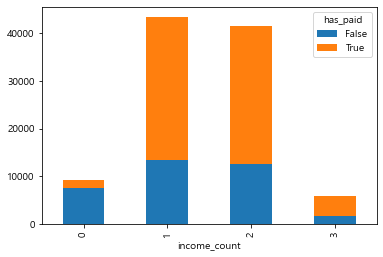

In [5]:
pd.crosstab(df['income_count'], df['has_paid']).plot(kind='bar', stacked=True)

#  income_count가 1과2인 고객에 대해서도 has_paid 여부를 구분할 수 있는 뭔가가 있었으면 좋겠는데 잘 못만들겠음

## 수수료 결제금액의 합

In [290]:
df['real_fee'] = df['fee']*df['has_paid']

In [291]:
df.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,real_fee,income_count
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN,0.0,3
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0,1700.0,3
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN,0.0,2
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN,0.0,2
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN,4300.0,3


In [293]:
df.corr()['real_fee'] #사업소득과 가장 큰 상관관계를 보인다 (fee제외)

age             0.058339
year            0.034013
refund          0.561167
fee             0.563712
has_paid        0.358132
income_근로      -0.083926
income_사업       0.535590
income_기타       0.356084
real_fee        1.000000
income_count    0.080038
Name: real_fee, dtype: float64

(array([8.8236e+04, 6.9120e+03, 2.8930e+03, 1.0690e+03, 5.6900e+02,
        1.2900e+02, 9.4000e+01, 4.1000e+01, 1.6000e+01, 1.3000e+01,
        3.0000e+00, 5.0000e+00, 6.0000e+00, 4.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([     0.        ,  10233.33333333,  20466.66666667,  30700.        ,
         40933.33333333,  51166.66666667,  61400.        ,  71633.33333333,
         81866.66666667,  92100.        , 102333.33333333, 112566.66666667,
        122800.        , 133033.33333333, 143266.66666667, 153500.        ,
        163733.33333333, 173966.66666667, 184200.        , 194433.33333333,
        204666.66666667, 214900.        , 225133.33333333, 235366.66666667,
        245600.        , 255833.33333333, 266066.66666667, 276300.        ,
        286533.33333333, 296766.66666667, 307000.        ]

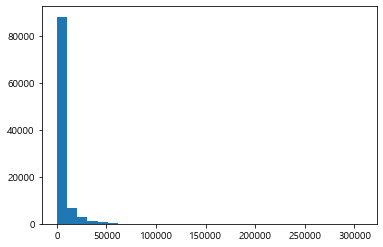

In [315]:
plt.hist(df['real_fee'],bins=30)#0값이 많아 0보다 큰 real_fee만

* 5만 이하의 데이터가 많다

In [341]:
print(str(len(df))+'개의 데이터 중 real_fee가 10000이하인 데이터의 개수는 ',str(sum(df['real_fee']<10000)))

print('real_fee가 10000이하인 데이터들의 총합은',str(sum(df[df['real_fee']<10000]['real_fee'])))


100000개의 데이터 중 real_fee가 10000이하인 데이터의 개수는  87862
real_fee가 10000이하인 데이터들의 총합은 144546100.0


(array([7.178e+03, 2.850e+03, 1.143e+03, 6.240e+02, 1.370e+02, 9.600e+01,
        4.700e+01, 1.800e+01, 1.500e+01, 4.000e+00, 6.000e+00, 1.000e+00,
        8.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 10200.        ,  20093.33333333,  29986.66666667,  39880.        ,
         49773.33333333,  59666.66666667,  69560.        ,  79453.33333333,
         89346.66666667,  99240.        , 109133.33333333, 119026.66666667,
        128920.        , 138813.33333333, 148706.66666667, 158600.        ,
        168493.33333333, 178386.66666667, 188280.        , 198173.33333333,
        208066.66666667, 217960.        , 227853.33333333, 237746.66666667,
        247640.        , 257533.33333333, 267426.66666667, 277320.        ,
        287213.33333333, 297106.66666667, 307000.        ]),
 <a list of 30 Patch objects>)

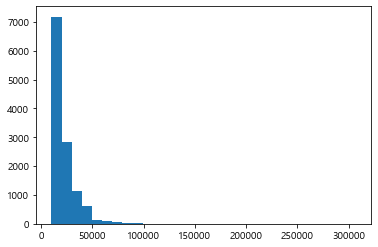

In [359]:
plt.hist(df[df['real_fee']>10000]['real_fee'],bins=30)#0값이 많아 0보다 큰 real_fee만

In [340]:
print(str(len(df))+'개의 데이터 중 real_fee가 10000이상인 데이터의 개수는 ',str(sum(df['real_fee']>=10000)))

print('real_fee가 10000이상인 데이터들의 총합은',str(sum(df[df['real_fee']>=10000]['real_fee'])))


100000개의 데이터 중 real_fee가 10000이상인 데이터의 개수는  12138
real_fee가 10000이상인 데이터들의 총합은 256854200.0


* 12138개의 데이터가 87862데이터보다 수수료 결제금액의 합이 약 1.7배 더 높다

#### 한번 더 세부적으로 그룹을 나눠보자

In [351]:
print(sum(df['real_fee']))
print(sum(df[df['real_fee']<10000]['real_fee']))
print(sum(df.query('real_fee>=10000 and real_fee<50000')['real_fee']))
print(sum(df.query('real_fee>=50000')['real_fee']))

401400300.0
144546100.0
232430400.0
24423800.0


#### 누적그래프 혹은 real_fee를 기준으로 groupby된 누적그래프를 그려보고 싶음

In [384]:
#누적
np.cumsum([1,2,3,4])

array([ 1,  3,  6, 10], dtype=int32)

In [368]:
#real_fee순으로 정렬해보기
df[df['real_fee']>0].sort_values(by='real_fee')

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,real_fee,income_count
99999,23.0,F,2019,34000.0,400.0,True,7344000.0,205000.0,NaN,400.0,3
59794,27.0,F,2017,21000.0,400.0,True,10270000.0,NaN,25000.0,400.0,3
24670,35.0,F,2020,10000.0,400.0,True,4337000.0,210000.0,NaN,400.0,3
59800,22.0,F,2019,51000.0,400.0,True,NaN,306000.0,NaN,400.0,2
24668,36.0,F,2018,34000.0,400.0,True,NaN,202000.0,NaN,400.0,2
...,...,...,...,...,...,...,...,...,...,...,...
50214,50.0,M,2020,5119000.0,203200.0,True,NaN,1958000.0,17702000.0,203200.0,3
87287,40.0,F,2018,5312000.0,210900.0,True,8029000.0,NaN,12755000.0,210900.0,3
87274,51.0,M,2020,5620000.0,223200.0,True,NaN,NaN,21093000.0,223200.0,2
30513,32.0,F,2017,6254000.0,248300.0,True,NaN,NaN,10918000.0,248300.0,2


In [357]:
#real_fee를 기준으로 묶어보기
df[df['real_fee']>0].groupby('real_fee').sum()

,age,year,refund,fee,has_paid,income_근로,income_사업,income_기타,income_count
real_fee,,,,,,,,,
400.0,635101.0,45046033,565524000.0,8930000.0,22325.0,6.692116e+10,3.603540e+09,1.024101e+09,56020
900.0,109094.0,7823327,204555000.0,3488400.0,3876.0,1.620080e+10,1.032084e+09,2.961270e+08,10212
1300.0,82296.0,5913834,216385000.0,3809000.0,2930.0,1.016076e+10,1.066121e+09,2.931710e+08,7616
1700.0,69067.0,4926940,232850000.0,4149700.0,2441.0,7.545816e+09,1.217276e+09,2.702000e+08,6368
2100.0,10617.0,770681,29481000.0,802200.0,382.0,7.719440e+08,1.833520e+08,1.058900e+07,930
...,...,...,...,...,...,...,...,...,...
203200.0,50.0,2020,5119000.0,203200.0,1.0,0.000000e+00,1.958000e+06,1.770200e+07,3
210900.0,40.0,2018,5312000.0,210900.0,1.0,8.029000e+06,0.000000e+00,1.275500e+07,3
223200.0,51.0,2020,5620000.0,223200.0,1.0,0.000000e+00,0.000000e+00,2.109300e+07,2
